In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [2]:
df = pd.read_csv('Renta.csv',sep=",",encoding='latin-1')
df =pd.DataFrame(df)

In [31]:
df.head(5)

,Años,Años_de_experiencia,Cargo,Sueldo
0,28,3.00,Full-Stack,1600000
1,29,1.40,Full-Stack,900000
2,30,4.60,Full-Stack,1700000
3,34,5.80,Full-Stack,1890000
4,33,3.65,Full-Stack,1780000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Años                 30 non-null     int64  
 1   Años_de_experiencia  30 non-null     float64
 2   Cargo                30 non-null     object 
 3   Sueldo               30 non-null     int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 1.1+ KB


In [5]:
#Feature
X = df.loc[:, ['Años','Años_de_experiencia','Cargo']]

#Variable dependiente
y =df.loc[:, ['Sueldo']]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=2)

In [34]:
y_train=np.ravel(y_train)
y_test=np.ravel(y_test)

In [48]:
#Codificacion de variable categorica
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), ['Cargo'])
    ],
    remainder='passthrough'
)

# Entrenamiento del modelo
modelo_1 = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

modelo_2 = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', MLPRegressor(solver="lbfgs",max_iter=5000,hidden_layer_sizes=(30,30)))
])


modelo_1.fit(X_train, y_train)
modelo_2.fit(X_train, y_train)

y_pred_1 = modelo_1.predict(X_test)
y_pred_2 = modelo_2.predict(X_test)

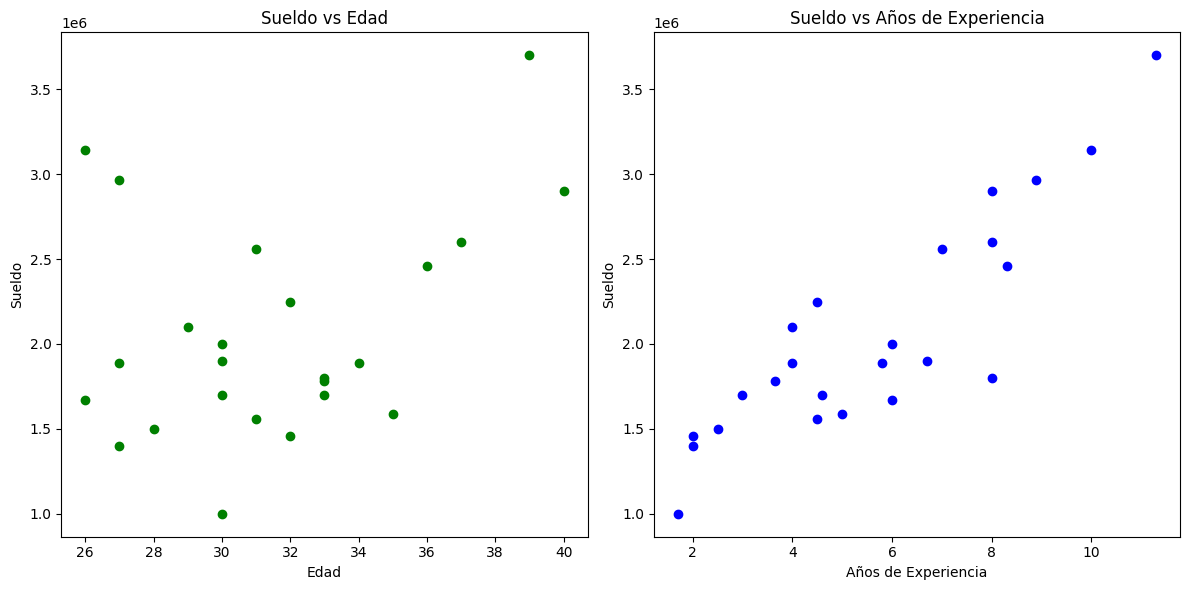

In [8]:
#Visualización de datos de entrenamiento
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(X_train.loc[:, ['Años']], y_train, color = 'green')
#viz_train.plot(X_train.loc[:, ['Años']], model.predict(X_train), color = 'black')
plt.title('Sueldo vs Edad')
plt.xlabel('Edad')
plt.ylabel('Sueldo')


plt.subplot(1, 2, 2)
plt.scatter(X_train.loc[:, ['Años_de_experiencia']], y_train, color = 'blue')
#viz_train.plot(X_train.loc[:, ['Años']], model.predict(X_train), color = 'black')
plt.title('Sueldo vs Años de Experiencia')
plt.xlabel('Años de Experiencia')
plt.ylabel('Sueldo')

plt.tight_layout()
plt.show()

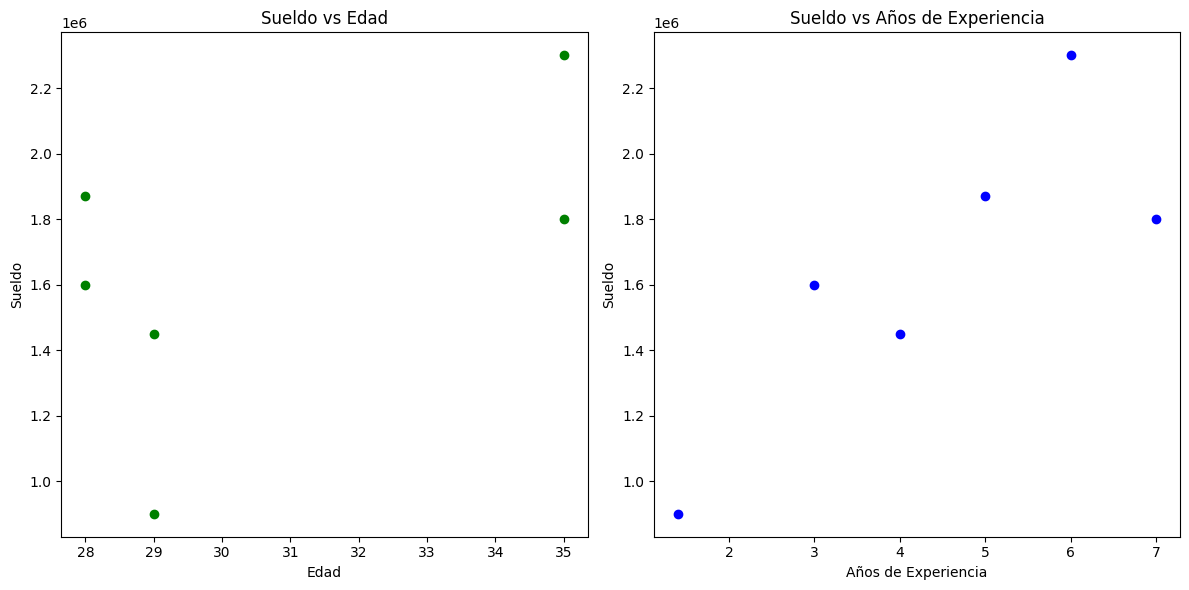

In [9]:
#Visualización de datos de test
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(X_test.loc[:, ['Años']], y_test, color = 'green')
#viz_train.plot(X_train.loc[:, ['Años']], model.predict(X_train), color = 'black')
plt.title('Sueldo vs Edad')
plt.xlabel('Edad')
plt.ylabel('Sueldo')


plt.subplot(1, 2, 2)
plt.scatter(X_test.loc[:, ['Años_de_experiencia']], y_test, color = 'blue')
#viz_train.plot(X_train.loc[:, ['Años']], model.predict(X_train), color = 'black')
plt.title('Sueldo vs Años de Experiencia')
plt.xlabel('Años de Experiencia')
plt.ylabel('Sueldo')

plt.tight_layout()
plt.show()

In [77]:
#Score del modelo de regresion multiple
print(modelo_1.score(X_test, y_test),modelo_2.score(X_test, y_test))
score_1=modelo_1.score(X_test, y_test)
score_2=modelo_2.score(X_test, y_test)


0.2820493202641323 0.5367047207585104


In [79]:
#Guardamos el modelo
pickle.dump(modelo_1, open('modelo_1.pkl','wb'))
pickle.dump(score_1, open('score_1.pkl','wb'))

#Guardamos el modelo
pickle.dump(modelo_2, open('modelo_2.pkl','wb'))
pickle.dump(score_2, open('score_2.pkl','wb'))

#Importamos el modelo guardado
modelo_1 = pickle.load(open('modelo_1.pkl','rb'))
score_1 = pickle.load(open('score_1.pkl','rb'))

#Importamos el modelo guardado
modelo_2 = pickle.load(open('modelo_2.pkl','rb'))
score_2 = pickle.load(open('score_2.pkl','rb'))


In [81]:
#Input para ingresar la edad,experiencia y cargo
experiencia = float(input('Ingrese el valor de Años de experiencia: '))
edad = float(input('Ingrese el valor de Edad: '))
cargo = input('Ingrese el Cargo: ')

# Se almacenan valores de entrada en un data frame
data = pd.DataFrame({'Años': [edad],'Años_de_experiencia': [experiencia], 'Cargo': [cargo]})

#Predicción del sueldo.
sueldo_1 = modelo_1.predict(data)
sueldo_2 = modelo_2.predict(data)

In [82]:
#Se redondea la prediccion del sueldo
sueldo_1= "${:,.2f}".format(int(sueldo_1[0]))
sueldo_2= "${:,.2f}".format(int(sueldo_2[0]))


sueldo 1 $1,996,339.00 y el score es 0.2820493202641323 sueldo 2 $1,709,816.00 y el score es 0.2820493202641323


In [84]:
#print(data)
print("sueldo 1",sueldo_1,"y el score es","${:,.2f}".format(score_1),"sueldo 2",sueldo_2,"y el score es","${:,.2f}".format(score_2))

sueldo 1 $1,996,339.00 y el score es $0.28 sueldo 2 $1,709,816.00 y el score es $0.54
